In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [8]:
labels = pd.read_csv("Datasets/celeba/labels.csv", index_col=0, sep='\t')

labels.head()
test = pd.Series(labels.gender.values)
test[0]

-1

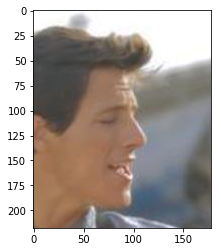

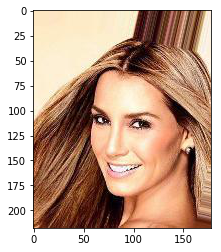

In [17]:
def getImage(row_id, root="Datasets/celeba/img"):
    fileName="{}.jpg".format(row_id)
    filePath = os.path.join(root, fileName)
    img = Image.open(filePath)
    return np.array(img)

maleRow = labels[labels.gender == 1].index[0]

plt.imshow(getImage(maleRow))
plt.show()

femaleRow = labels[labels.gender == -1].index[0]
plt.imshow(getImage(femaleRow))
plt.show()

Color Male image has shape:  [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[146 110  86]
  [147 111  87]
  [150 114  88]
  ...
  [ 91  89  92]
  [ 92  92  94]
  [ 92  92  94]]

 [[135 100  78]
  [136 102  77]
  [139 105  80]
  ...
  [ 96  91  97]
  [ 94  94  96]
  [ 94  94  96]]

 [[131  99  78]
  [132 100  77]
  [137 103  78]
  ...
  [ 96  91  97]
  [ 94  94  96]
  [ 94  94  96]]]
Greyscale male imge has shape [[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.45458667 0.45850824 0.46970745 ... 0.35153451 0.3613498  0.3613498 ]
 [0.41510314 0

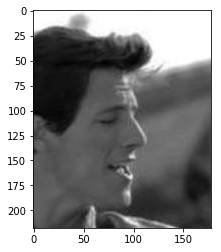

In [38]:
male = getImage(maleRow)

print("Color Male image has shape: ", male)

maleGrey = rgb2grey(male)

plt.imshow(maleGrey, cmap=mpl.cm.gray)

print("Greyscale male imge has shape", maleGrey)

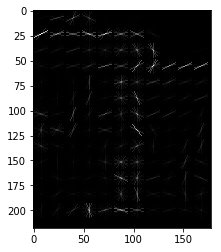

In [45]:
hogFeatures, hogImage = hog(maleGrey, 
                            visualise=True,
                            block_norm="L2-Hys",
                            pixels_per_cell=(16,16))
plt.imshow(hogImage, cmap = mpl.cm.gray)

In [47]:
def createFeatures(img):
    colorFeatures = img.flatten()
    imgGrey = rgb2grey(img)
    hogFeartures = hog(imgGrey, block_norm="L2-Hys", pixels_per_cell=(16,16))
    flatFeatures = np.hstack(colorFeatures)
    return flatFeatures

maleFeatures = createFeatures(male)

print(maleFeatures)

[255 255 255 ...  94  94  96]


In [51]:
def createFeatureMatrix(labelDataframe):
    featureList = []
    i = 0
    for imgId in labelDataframe.index:
        img = getImage(imgId)
        imageFeatures = createFeatures(img)
        featureList.append(imageFeatures)
        if(i % 100 == 0):
            print("Done: ", i)
        i+=1
    
    featureMatrix = np.array(featureList)
    return featureMatrix

featureMatrix = createFeatureMatrix(labels)

Done:  0
Done:  100
Done:  200
Done:  300
Done:  400
Done:  500
Done:  600
Done:  700
Done:  800
Done:  900
Done:  1000
Done:  1100
Done:  1200
Done:  1300
Done:  1400
Done:  1500
Done:  1600
Done:  1700
Done:  1800
Done:  1900
Done:  2000
Done:  2100
Done:  2200
Done:  2300
Done:  2400
Done:  2500
Done:  2600
Done:  2700
Done:  2800
Done:  2900
Done:  3000
Done:  3100
Done:  3200
Done:  3300
Done:  3400
Done:  3500
Done:  3600
Done:  3700
Done:  3800
Done:  3900
Done:  4000
Done:  4100
Done:  4200
Done:  4300
Done:  4400
Done:  4500
Done:  4600
Done:  4700
Done:  4800
Done:  4900


In [56]:
print("Feature Matrix Shape is: ", featureMatrix.shape)

ss = StandardScaler()
peopleStand = ss.fit_transform(featureMatrix)

pca = PCA(n_components=500)
peoplePCA = ss.fit_transform(peopleStand)
print("PCA Matrix Shape is: ", peoplePCA.shape)

Feature Matrix Shape is:  (5000, 116412)


/Users/Rawtimmy/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


PCA Matrix Shape is:  (5000, 116412)


In [57]:
X = pd.DataFrame(peoplePCA)
y = pd.Series(labels.gender.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=1234123)

pd.Series(y_train).value_counts()

-1    1782
 1    1718
dtype: int64

In [58]:
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy is: ", accuracy)

Model Accuracy is:  0.898
